Análise de Consumo de Energia Power Edge

1. Importando bibliotecas e carregando os dados



In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt 

DATASET_FILENAME = "./data/dataset.csv"

energy_raw = pd.read_csv(DATASET_FILENAME, parse_dates=["Date and time"])

energy_raw = energy_raw.drop(columns=[col for col in energy_raw.columns if col.startswith('temp')])
energy_raw['Date and time'] = pd.to_datetime(energy_raw['Date and time']).dt.tz_localize(None)
print(energy_raw.dtypes)

print(energy_raw.describe(include='all'))
summary_statistics = energy_raw.describe()

Date and time           datetime64[ns]
potmin_SMV340200               float64
potmin_SMV340201               float64
potmin_SMV340202               float64
potmin_SMV340203               float64
                             ...      
potavg_idrac-9DQGPV3           float64
potavg_idrac-BDQGPV3           float64
potavg_idrac-CDQGPV3           float64
potavg_idrac-DDQGPV3           float64
potavg_idrac-FDQGPV3           float64
Length: 76, dtype: object
             Date and time  potmin_SMV340200  potmin_SMV340201  \
count                  672        666.000000        666.000000   
mean   2025-06-14 04:07:30        701.207207        714.794294   
min    2025-06-10 16:15:00        660.000000        686.000000   
25%    2025-06-12 10:11:15        690.000000        704.000000   
50%    2025-06-14 04:07:30        699.000000        714.000000   
75%    2025-06-15 22:03:45        712.000000        725.000000   
max    2025-06-17 16:00:00        746.000000        763.000000   
std              

                      count     mean     std     min      25%      50%  \
potavg_SMV340200      666.0   729.33   20.12  698.41   713.43   723.88   
potavg_SMV340201      666.0   740.81   18.21  713.27   724.91   737.85   
potavg_SMV340202      666.0   736.28   22.91  698.28   716.56   734.49   
potavg_SMV340203      668.0   765.89   25.50  722.19   745.03   764.18   
potavg_SMV340204      641.0  1013.26  108.92  683.30   937.01  1011.71   
potavg_SMV340205      668.0   952.79   43.79  791.50   931.60   966.67   
potavg_SMV340206      668.0   897.39   39.90  825.94   861.31   895.79   
potavg_SMV340207      630.0   954.32   76.38  657.94   908.32   945.05   
potavg_SMV340208      586.0  1111.49   84.77  662.58  1054.75  1099.20   
potavg_SMV340209      668.0   956.68   67.28  655.86   904.56   949.95   
potavg_SMV340210      666.0  1054.54   56.84  671.77  1024.19  1054.01   
potavg_SMV340211      664.0   968.22  189.21  650.92   689.34  1047.48   
potavg_SMV340212      592.0   848.51  

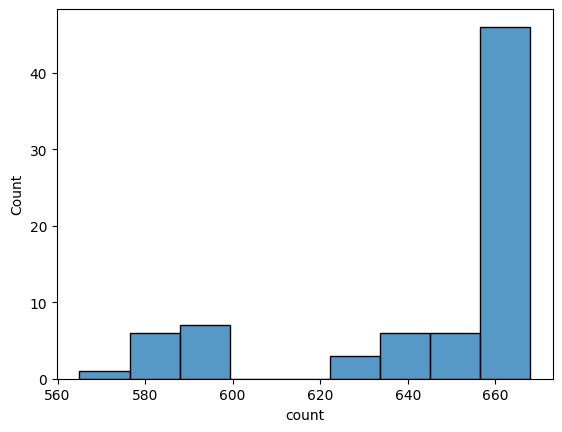

In [2]:
# Plotando o histograma de quantidade de medidas realizadas
sns.histplot(summary_statistics.iloc[0,1:])
potavg_cols = [col for col in energy_raw.columns if col.startswith('potavg')]
print(energy_raw[potavg_cols].describe().T.round(2))




## Visualizando o consumo por dia no período  



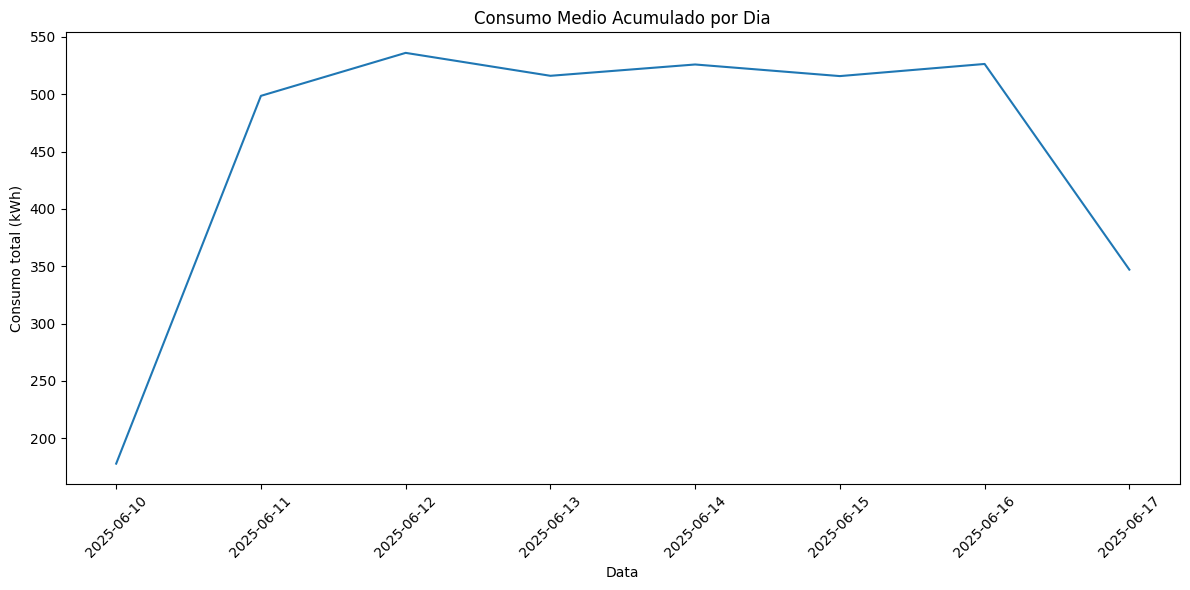

In [3]:
energy_raw['data'] = energy_raw['Date and time'].dt.date 
energy_raw['consumo_total'] = energy_raw[potavg_cols].sum(axis=1) * 0.25 / 1000

consumo_dia = energy_raw.groupby('data')['consumo_total'].sum()

# Plotagem dos dados  

plt.figure(figsize=(12, 6))
sns.lineplot(data=consumo_dia)
plt.title("Consumo Medio Acumulado por Dia")
plt.ylabel("Consumo total (kWh)")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






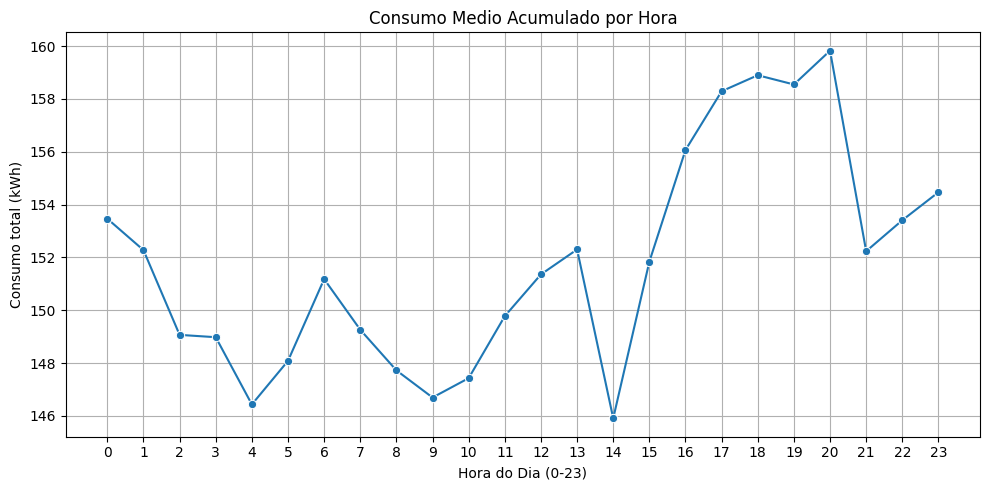

In [4]:
energy_raw['hora_do_dia'] = energy_raw['Date and time'].dt.hour
consumo_por_hora = energy_raw.groupby('hora_do_dia')['consumo_total'].sum()

# Plotagem dos dados
plt.figure(figsize=(10, 5))
sns.lineplot(x=consumo_por_hora.index, y=consumo_por_hora.values, marker='o')

plt.title("Consumo Medio Acumulado por Hora")
plt.ylabel("Consumo total (kWh)")
plt.xlabel("Hora do Dia (0-23)")
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()



## Avaliar a média e a dispersão dos dados de consumo de energia

/var/folders/ml/t4j3y5sx31lfp68jb0y0zq9c0000gn/T/ipykernel_84247/2939281603.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top10.index, x=top10.values, ax=ax[0], palette='viridis')
/var/folders/ml/t4j3y5sx31lfp68jb0y0zq9c0000gn/T/ipykernel_84247/2939281603.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=botton10.index, x=botton10.values, ax=ax[1], palette='Greens')


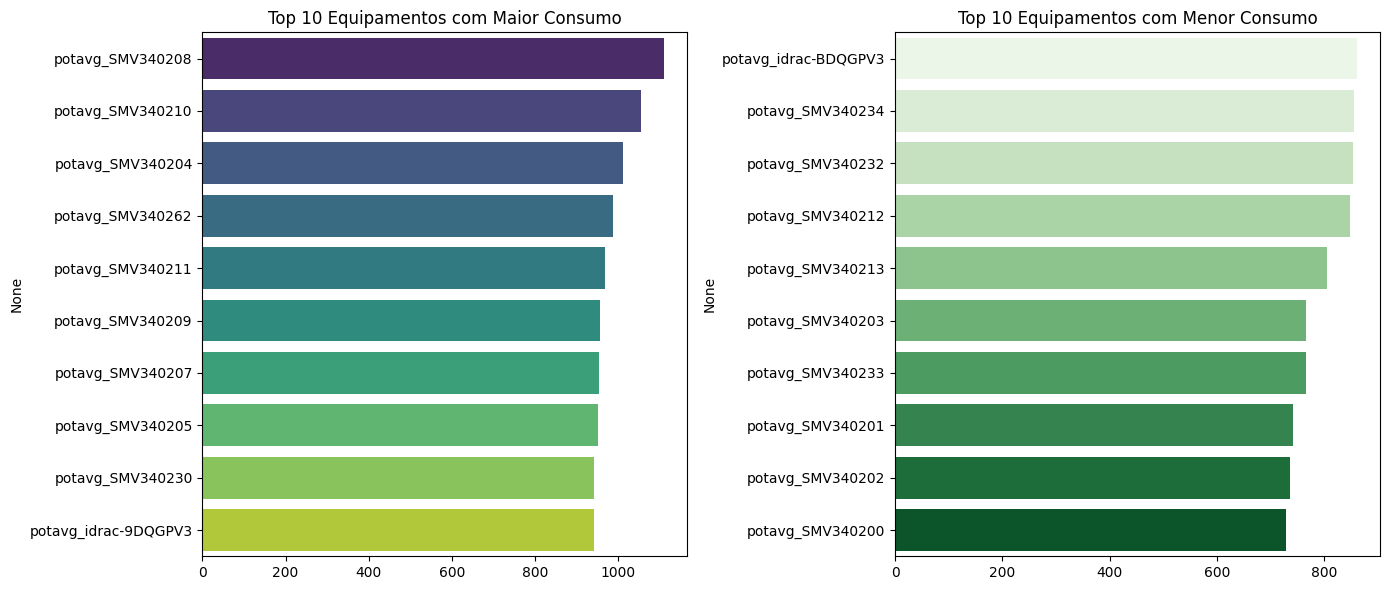

In [5]:
media_consumo = energy_raw[potavg_cols].mean().sort_values(ascending=False) 
top10 = media_consumo.head(10) 
botton10 = media_consumo.tail(10) 

fig, ax = plt.subplots(1,2,figsize=(14,6)) 

sns.barplot(y=top10.index, x=top10.values, ax=ax[0], palette='viridis')
ax[0].set_title("Top 10 Equipamentos com Maior Consumo")

sns.barplot(y=botton10.index, x=botton10.values, ax=ax[1], palette='Greens')
ax[1].set_title("Top 10 Equipamentos com Menor Consumo") 

plt.tight_layout()
plt.show() 


In [6]:
## Analise Gemini 

import sklearn.preprocessing as StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Estilo dos gráficos 
sns.set_style(style="whitegrid")
%matplotlib inline 

# --- Etapa de Transformação: Do formato WIDE para LONG, mantendo todas as métricas ---

# O DataFrame 'df_wide' foi carregado a partir do seu arquivo CSV
# Agora, vamos transformá-lo para incluir todas as métricas de consumo

# 1. Identificar a coluna de data/hora (chave da transformação)
id_vars_col = 'Date and time'

# 2. Selecionar TODAS as colunas de consumo (potmin, potmax, potavg)
# Filtramos todas as colunas que começam com 'pot'
cols_to_melt = [col for col in energy_raw.columns if col.startswith('pot')]

# 3. Utilizar a função pd.melt() para "derreter" o DataFrame
# O 'var_name' irá capturar o nome completo da coluna, como 'potmin_SMV340200'
energy_long = pd.melt(energy_raw, 
             id_vars=[id_vars_col], 
             value_vars=cols_to_melt, 
             var_name='metric_and_id', 
             value_name='consumo_kwh')

# 4. Renomear a coluna de timestamp para um nome mais limpo e consistente
energy_long.rename(columns={id_vars_col: 'timestamp'}, inplace=True)

# 5. Criar duas novas colunas a partir do nome da coluna derretida: 'medida' e 'equipamento_id'
# Exemplo: 'potmin_SMV340200' -> medida='min', equipamento_id='SMV340200'
energy_long['metrica'] = energy_long['metric_and_id'].apply(lambda x: x.split('_')[0].replace('pot', ''))
energy_long['equipamento_id'] = energy_long['metric_and_id'].apply(lambda x: '_'.join(x.split('_')[1:]))

# 6. Remover a coluna temporária usada para a divisão
energy_long.drop(columns=['metric_and_id'], inplace=True)

# 7. Remover linhas com valores nulos que podem ter sido criados na transformação
energy_long.dropna(inplace=True)

# 8. Imprimir a verificação do novo DataFrame
print("\nPrimeiras 5 linhas do DataFrame após a transformação (com todas as métricas):")
print(energy_long.head())
print("\nInformações sobre o novo DataFrame:")
print(energy_long.info())
print(f"\nMétricas de consumo disponíveis: {energy_long['metrica'].unique()}")
print(f"Número de equipamentos identificados: {energy_long['equipamento_id'].nunique()}")
print(f"Total de medições: {energy_long.shape[0]}")


Primeiras 5 linhas do DataFrame após a transformação (com todas as métricas):
            timestamp  consumo_kwh metrica equipamento_id
0 2025-06-10 16:15:00        714.0     min      SMV340200
1 2025-06-10 16:30:00        729.0     min      SMV340200
2 2025-06-10 16:45:00        711.0     min      SMV340200
3 2025-06-10 17:00:00        720.0     min      SMV340200
4 2025-06-10 17:15:00        722.0     min      SMV340200

Informações sobre o novo DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 48549 entries, 0 to 50399
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       48549 non-null  datetime64[ns]
 1   consumo_kwh     48549 non-null  float64       
 2   metrica         48549 non-null  object        
 3   equipamento_id  48549 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.9+ MB
None

Métricas de consumo disponíveis: ['min' 'max

## Recorrendo ao Boxplot para visualizar a distribuição dos dados de consumo de energia


/var/folders/ml/t4j3y5sx31lfp68jb0y0zq9c0000gn/T/ipykernel_84247/3231664757.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='equipamento_id', y='consumo_kwh', data=energy_filtered, order=equipamentos_para_plot, palette='viridis')


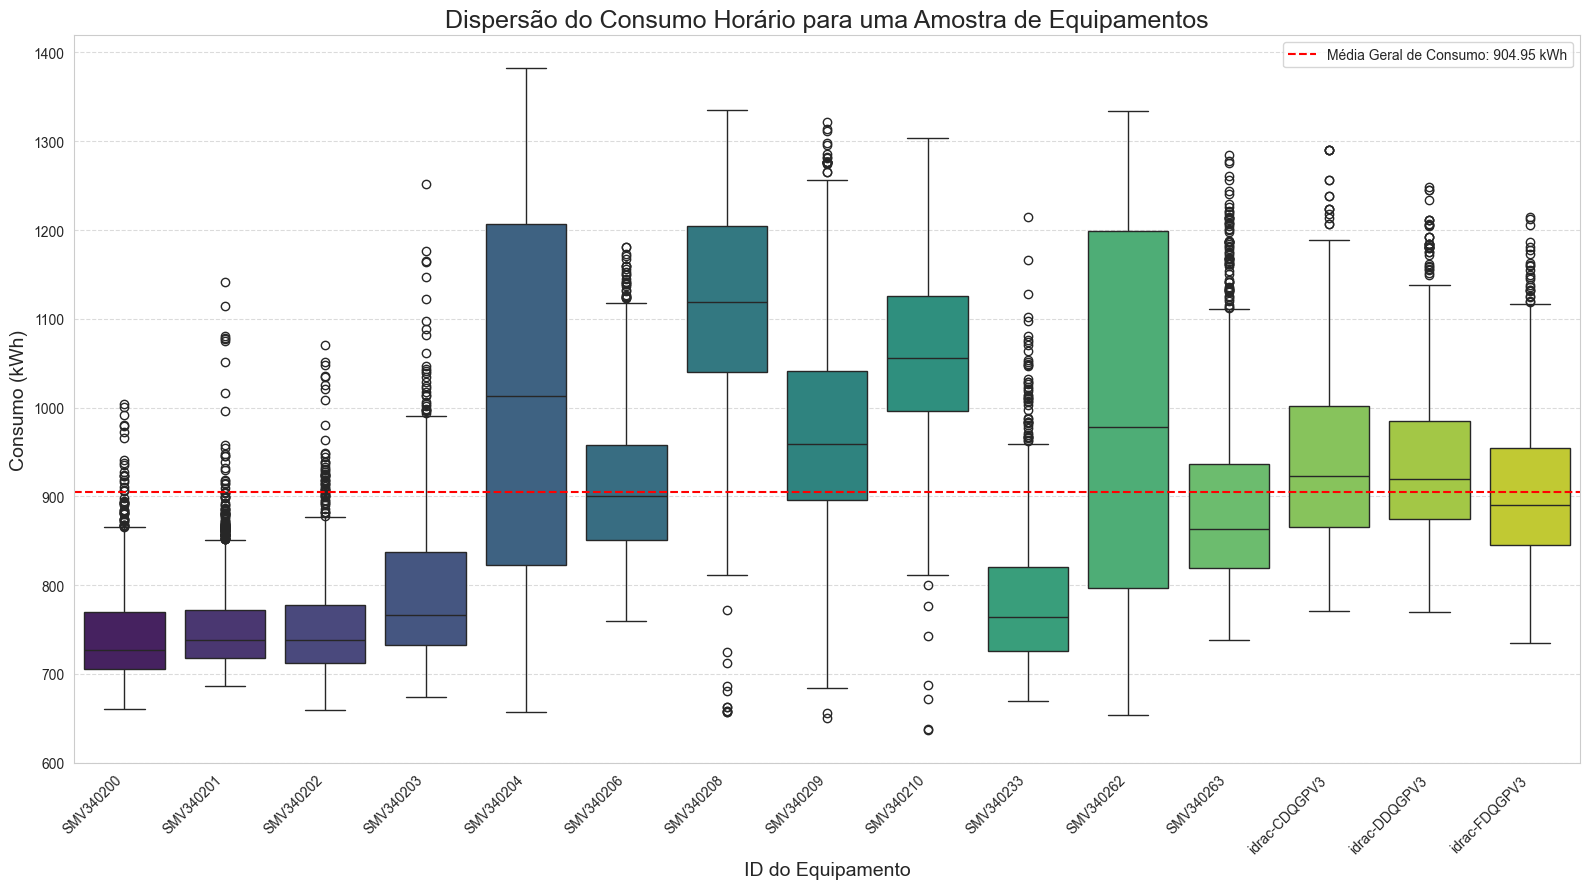

In [7]:
# --- Análise e Transformação para a nova visualização ---

# Calculando o consumo médio de cada equipamento para seleção da amostra
consumo_medio_por_equip = energy_long.groupby('equipamento_id')['consumo_kwh'].mean().reset_index()
consumo_medio_por_equip = consumo_medio_por_equip.sort_values(by='consumo_kwh', ascending=False)

# Selecionando uma amostra representativa de equipamentos para a visualização:
# 5 maiores consumidores, 5 menores e 5 do meio da distribuição
top_5 = consumo_medio_por_equip.head(5)['equipamento_id'].tolist()
bottom_5 = consumo_medio_por_equip.tail(5)['equipamento_id'].tolist()
middle_5 = consumo_medio_por_equip.iloc[len(consumo_medio_por_equip)//2 - 2 : len(consumo_medio_por_equip)//2 + 3]['equipamento_id'].tolist()

equipamentos_para_plot = top_5 + middle_5 + bottom_5
equipamentos_para_plot = sorted(list(set(equipamentos_para_plot))) # Garante IDs únicos e ordenados

# Filtrando o DataFrame original para incluir apenas os dados dos equipamentos selecionados
energy_filtered = energy_long[energy_long['equipamento_id'].isin(equipamentos_para_plot)]

# Calculando a média geral de consumo para todos os equipamentos (linha de referência)
media_geral = energy_long['consumo_kwh'].mean()

# --- Visualização dos Dados (Boxplot) ---
plt.figure(figsize=(16, 9))
sns.boxplot(x='equipamento_id', y='consumo_kwh', data=energy_filtered, order=equipamentos_para_plot, palette='viridis')

# Adicionando uma linha horizontal para representar a média geral de todos os equipamentos
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral de Consumo: {media_geral:.2f} kWh')

plt.title('Dispersão do Consumo Horário para uma Amostra de Equipamentos', fontsize=18)
plt.xlabel('ID do Equipamento', fontsize=14)
plt.ylabel('Consumo (kWh)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Fazendo agrupamento dos dados para classificação entre baixo, medio e alto consumo 
# Usando KMEANS 




Amostra dos equipamentos com seus grupos de consumo:
   equipamento_id  consumo_kwh
23  idrac-DDQGPV3   936.479091
13      SMV340213   828.878520
22  idrac-CDQGPV3   933.951241
0       SMV340200   743.806396
15      SMV340232   853.392314


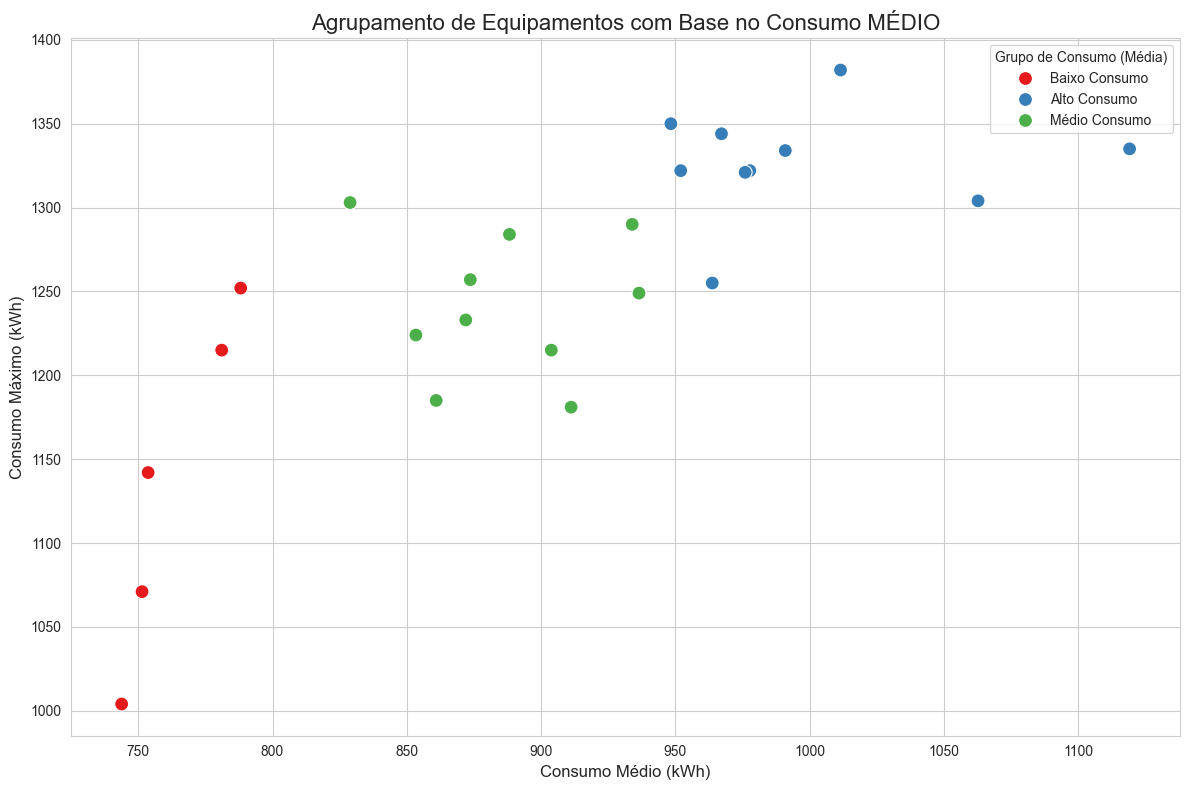

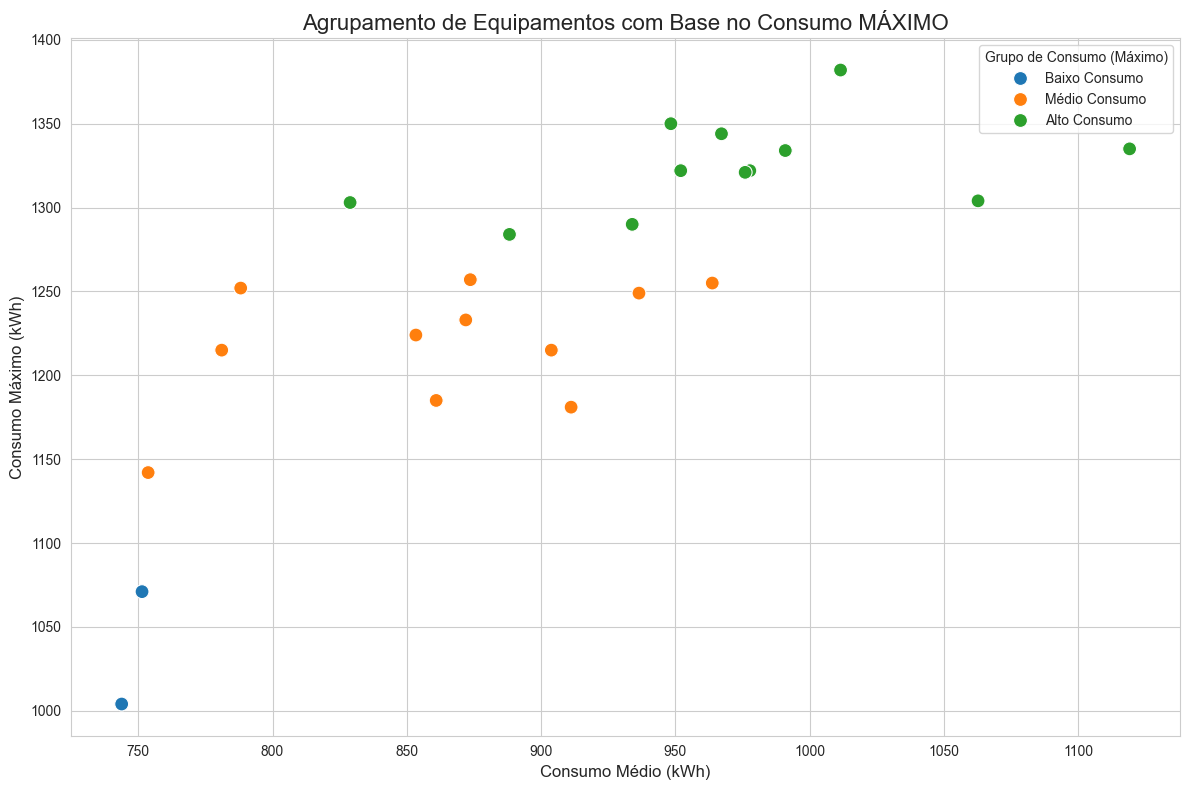


Contagem de equipamentos por grupo (agrupado por Média):
grupo_por_media
Alto Consumo     10
Médio Consumo    10
Baixo Consumo     5
Name: count, dtype: int64

Contagem de equipamentos por grupo (agrupado por Máximo):
grupo_por_maximo
Alto Consumo     12
Médio Consumo    11
Baixo Consumo     2
Name: count, dtype: int64


In [8]:
# --- Preparação dos dados para o clustering ---
# Já temos o DataFrame 'consumo_medio_por_equip'
# Precisamos normalizar os dados para que o algoritmo de clustering funcione corretamente
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# --- Análise e Transformação para o agrupamento de pontos ---
# 1. Agrupar por equipamento para calcular o consumo médio e máximo
consumo_agregado = energy_long.groupby('equipamento_id')['consumo_kwh'].agg(['mean', 'max']).reset_index()
consumo_agregado.columns = ['equipamento_id', 'consumo_medio_kwh', 'consumo_maximo_kwh']



# Dados para o clustering: apenas a coluna de consumo médio
X_mean = consumo_agregado[['consumo_medio_kwh']]
scaler_mean = StandardScaler()
X_mean_scaled = scaler_mean.fit_transform(X_mean)

# Aplicando o K-Means para 3 clusters
kmeans_mean = KMeans(n_clusters=3, random_state=42, n_init=10)
consumo_agregado['grupo_por_media'] = kmeans_mean.fit_predict(X_mean_scaled)

# Mapeando os clusters para categorias de texto (Baixo, Médio, Alto)
grupos_ordenados_mean = consumo_agregado.groupby('grupo_por_media')['consumo_medio_kwh'].mean().sort_values().index
mapping_mean = {grupos_ordenados_mean[0]: 'Baixo Consumo', 
                grupos_ordenados_mean[1]: 'Médio Consumo', 
                grupos_ordenados_mean[2]: 'Alto Consumo'}
consumo_agregado['grupo_por_media'] = consumo_agregado['grupo_por_media'].map(mapping_mean)


# --- Agrupamento 2: Com base no CONSUMO MÁXIMO ---
# Dados para o clustering: apenas a coluna de consumo máximo
X_max = consumo_agregado[['consumo_maximo_kwh']]
scaler_max = StandardScaler()
X_max_scaled = scaler_max.fit_transform(X_max)

# Aplicando o K-Means para 3 clusters
kmeans_max = KMeans(n_clusters=3, random_state=42, n_init=10)
consumo_agregado['grupo_por_maximo'] = kmeans_max.fit_predict(X_max_scaled)

# Mapeando os clusters para categorias de texto
grupos_ordenados_max = consumo_agregado.groupby('grupo_por_maximo')['consumo_maximo_kwh'].mean().sort_values().index
mapping_max = {grupos_ordenados_max[0]: 'Baixo Consumo', 
               grupos_ordenados_max[1]: 'Médio Consumo', 
               grupos_ordenados_max[2]: 'Alto Consumo'}
consumo_agregado['grupo_por_maximo'] = consumo_agregado['grupo_por_maximo'].map(mapping_max)


print("\nAmostra dos equipamentos com seus grupos de consumo:")
print(consumo_medio_por_equip.sample(5))


# --- Visualização 1: Agrupamento com base no Consumo MÉDIO ---
plt.figure(figsize=(12, 8))
sns.scatterplot(x='consumo_medio_kwh', y='consumo_maximo_kwh', hue='grupo_por_media', data=consumo_agregado, palette='Set1', s=100)
plt.title('Agrupamento de Equipamentos com Base no Consumo MÉDIO', fontsize=16)
plt.xlabel('Consumo Médio (kWh)', fontsize=12)
plt.ylabel('Consumo Máximo (kWh)', fontsize=12)
plt.legend(title='Grupo de Consumo (Média)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Visualização 2: Agrupamento com base no Consumo MÁXIMO ---
plt.figure(figsize=(12, 8))
sns.scatterplot(x='consumo_medio_kwh', y='consumo_maximo_kwh', hue='grupo_por_maximo', data=consumo_agregado, palette='tab10', s=100)
plt.title('Agrupamento de Equipamentos com Base no Consumo MÁXIMO', fontsize=16)
plt.xlabel('Consumo Médio (kWh)', fontsize=12)
plt.ylabel('Consumo Máximo (kWh)', fontsize=12)
plt.legend(title='Grupo de Consumo (Máximo)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Resumo da contagem de cada grupo para as duas métricas
print("\nContagem de equipamentos por grupo (agrupado por Média):")
print(consumo_agregado['grupo_por_media'].value_counts())
print("\nContagem de equipamentos por grupo (agrupado por Máximo):")
print(consumo_agregado['grupo_por_maximo'].value_counts())

## Abordagem Z-Score para identificar outliers 
# Gemini


Amostra dos equipamentos com o novo agrupamento por regra:
   equipamento_id  consumo_medio_kwh  consumo_maximo_kwh grupo_por_media  \
13      SMV340213         828.878520              1303.0   Médio Consumo   
23  idrac-DDQGPV3         936.479091              1249.0   Médio Consumo   
21  idrac-BDQGPV3         873.656826              1257.0   Médio Consumo   
24  idrac-FDQGPV3         903.831870              1215.0   Médio Consumo   
0       SMV340200         743.806396              1004.0   Baixo Consumo   

   grupo_por_maximo grupo_por_regra  
13     Alto Consumo   Médio Consumo  
23    Médio Consumo   Médio Consumo  
21    Médio Consumo   Médio Consumo  
24    Médio Consumo   Médio Consumo  
0     Baixo Consumo   Baixo Consumo  


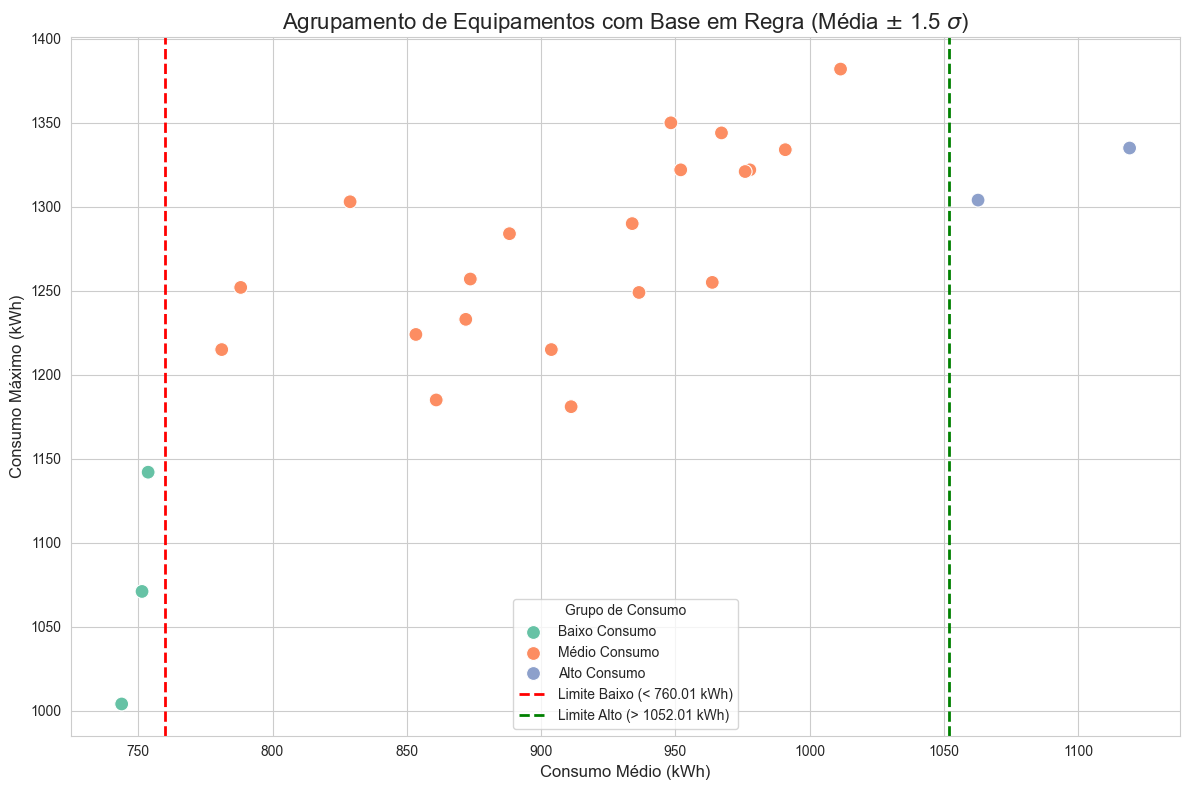


Contagem de equipamentos por grupo (agrupado por regra):
grupo_por_regra
Médio Consumo    20
Baixo Consumo     3
Alto Consumo      2
Name: count, dtype: int64


In [9]:
# --- Análise e Transformação para a Agregação Baseada em Regras ---
# 1. Calcular a média e o desvio padrão da média de consumo de todos os equipamentos
media_geral_equip = consumo_agregado['consumo_medio_kwh'].mean()
std_geral_equip = consumo_agregado['consumo_medio_kwh'].std()

# 2. Definir os limites de desvio padrão
limite_baixo = media_geral_equip - 1.5 * std_geral_equip
limite_alto = media_geral_equip + 1.5 * std_geral_equip

# 3. Aplicar a regra para criar a nova coluna de agrupamento
consumo_agregado['grupo_por_regra'] = np.where(
    consumo_agregado['consumo_medio_kwh'] < limite_baixo, 'Baixo Consumo',
    np.where(consumo_agregado['consumo_medio_kwh'] > limite_alto, 'Alto Consumo', 'Médio Consumo')
)

print("\nAmostra dos equipamentos com o novo agrupamento por regra:")
print(consumo_agregado.sample(5))

# --- Visualização dos Dados com a nova regra de agrupamento ---
plt.figure(figsize=(12, 8))
sns.scatterplot(x='consumo_medio_kwh', y='consumo_maximo_kwh', hue='grupo_por_regra', data=consumo_agregado, palette='Set2', s=100)

# Adicionar linhas de referência para os limites
plt.axvline(x=limite_baixo, color='red', linestyle='--', linewidth=2, label=f'Limite Baixo (< {limite_baixo:.2f} kWh)')
plt.axvline(x=limite_alto, color='green', linestyle='--', linewidth=2, label=f'Limite Alto (> {limite_alto:.2f} kWh)')

plt.title('Agrupamento de Equipamentos com Base em Regra (Média $\\pm$ 1.5 $\\sigma$)', fontsize=16)
plt.xlabel('Consumo Médio (kWh)', fontsize=12)
plt.ylabel('Consumo Máximo (kWh)', fontsize=12)
plt.legend(title='Grupo de Consumo')
plt.grid(True)
plt.tight_layout()
plt.show()

# Resumo do tamanho de cada grupo
print("\nContagem de equipamentos por grupo (agrupado por regra):")
print(consumo_agregado['grupo_por_regra'].value_counts())

## Experimentação do KMEANS com remoção de outliers 
# abordagem Interquartile range (IQR) para remover outliers


Total de equipamentos originais: 25
Total de outliers identificados e removidos: 0
Total de equipamentos para clustering: 25


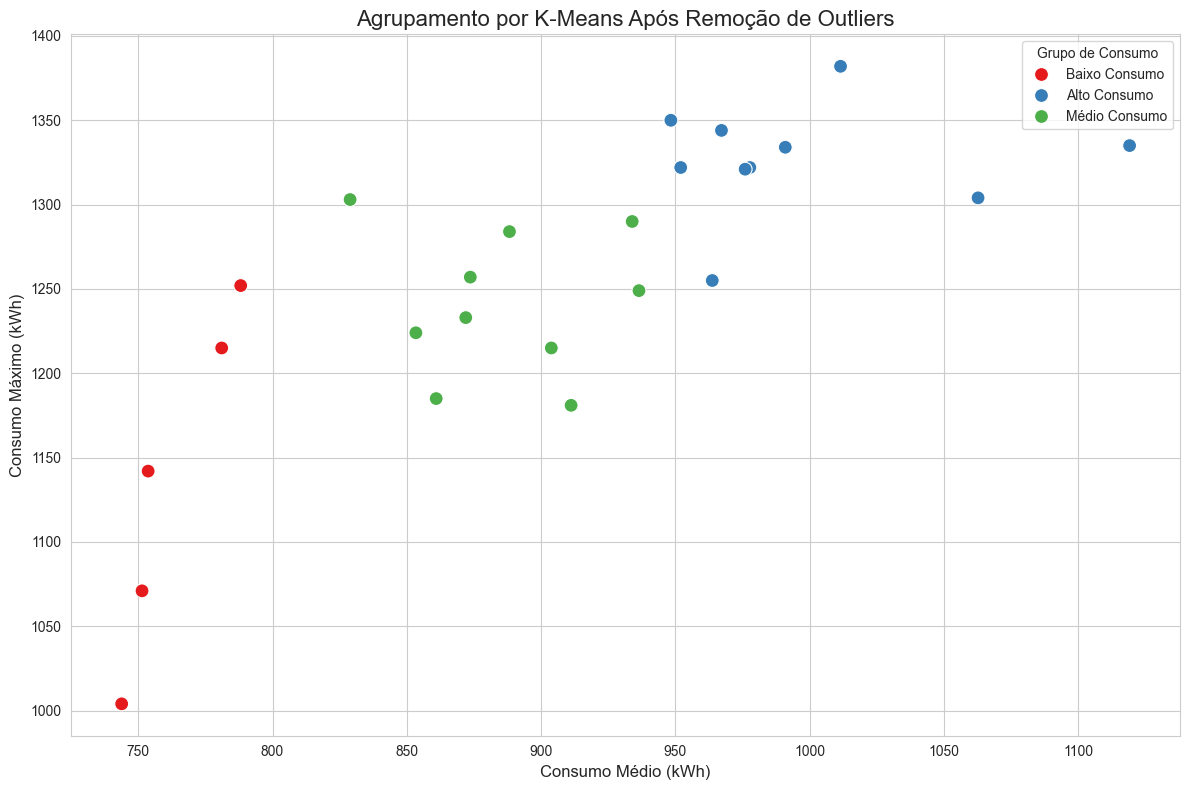


Contagem de equipamentos por grupo (após remoção de outliers):
grupo_por_media_limpo
Alto Consumo     10
Médio Consumo    10
Baixo Consumo     5
Name: count, dtype: int64


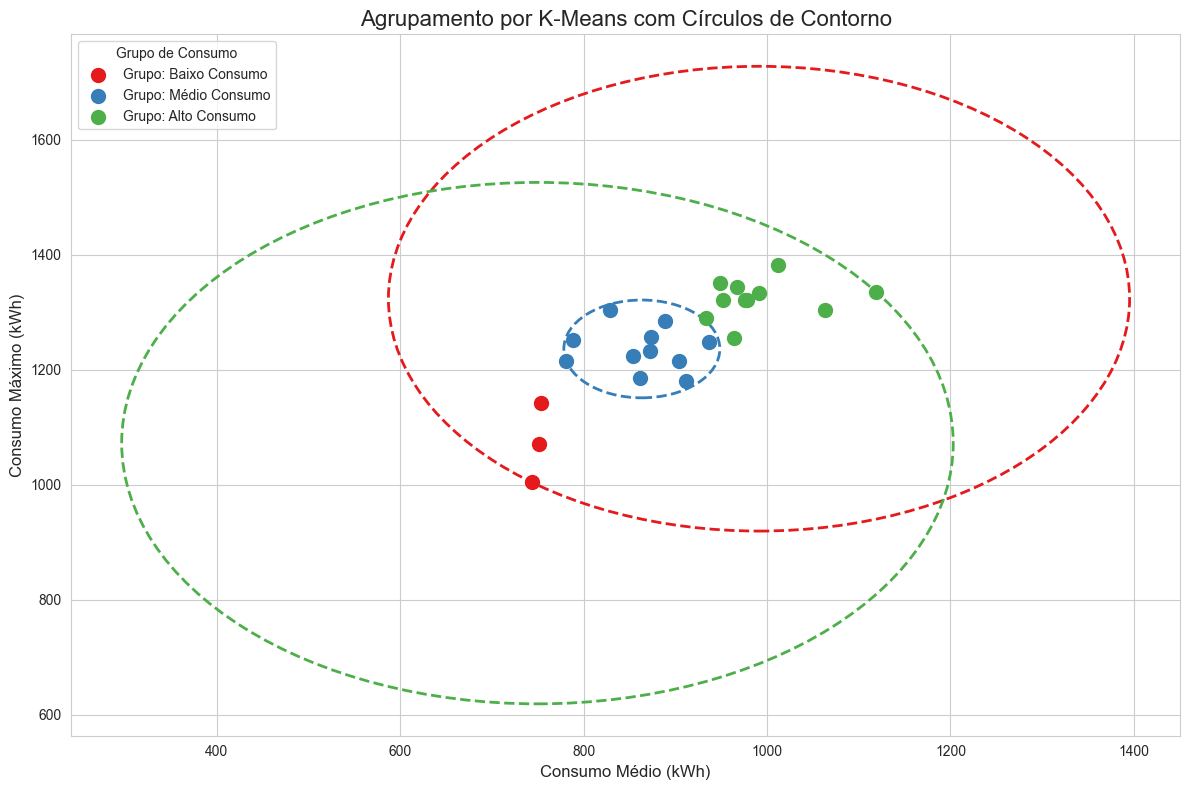


Verificação: Foram identificados e removidos 0 outliers antes do agrupamento. Se este valor for zero, os pontos cinza não aparecerão no gráfico.


In [10]:
# --- Análise e Transformação: K-Means após remoção de Outliers ---
# 1. Identificar e remover outliers usando o método do IQR (Interquartile Range)
Q1 = consumo_agregado['consumo_medio_kwh'].quantile(0.25)
Q3 = consumo_agregado['consumo_medio_kwh'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para outliers (1.5 * IQR é uma regra comum)
limite_inferior_outlier = Q1 - 1.5 * IQR
limite_superior_outlier = Q3 + 1.5 * IQR

# Filtrar o DataFrame para remover os outliers
consumo_agregado_limpo = consumo_agregado[
    (consumo_agregado['consumo_medio_kwh'] >= limite_inferior_outlier) & 
    (consumo_agregado['consumo_medio_kwh'] <= limite_superior_outlier)
].copy()

# Identificar os outliers removidos para visualização posterior
outliers_df = consumo_agregado[
    (consumo_agregado['consumo_medio_kwh'] < limite_inferior_outlier) | 
    (consumo_agregado['consumo_medio_kwh'] > limite_superior_outlier)
].copy()

print(f"Total de equipamentos originais: {consumo_agregado.shape[0]}")
print(f"Total de outliers identificados e removidos: {outliers_df.shape[0]}")
print(f"Total de equipamentos para clustering: {consumo_agregado_limpo.shape[0]}")

# 2. Aplicar o K-Means nos dados limpos
X_limpo = consumo_agregado_limpo[['consumo_medio_kwh']]
scaler_limpo = StandardScaler()
X_limpo_scaled = scaler_limpo.fit_transform(X_limpo)

kmeans_limpo = KMeans(n_clusters=3, random_state=42, n_init=10)
consumo_agregado_limpo['grupo_por_media_limpo'] = kmeans_limpo.fit_predict(X_limpo_scaled)

# Mapear os clusters para categorias de texto
grupos_ordenados_limpo = consumo_agregado_limpo.groupby('grupo_por_media_limpo')['consumo_medio_kwh'].mean().sort_values().index
mapping_limpo = {grupos_ordenados_limpo[0]: 'Baixo Consumo', 
                 grupos_ordenados_limpo[1]: 'Médio Consumo', 
                 grupos_ordenados_limpo[2]: 'Alto Consumo'}
consumo_agregado_limpo['grupo_por_media_limpo'] = consumo_agregado_limpo['grupo_por_media_limpo'].map(mapping_limpo)

# 3. Visualização do Agrupamento após a remoção de outliers
plt.figure(figsize=(12, 8))
# Plotar os dados clusterizados
sns.scatterplot(x='consumo_medio_kwh', y='consumo_maximo_kwh', hue='grupo_por_media_limpo', data=consumo_agregado_limpo, palette='Set1', s=100)
# Plotar os outliers removidos em uma cor e formato diferentes
sns.scatterplot(x='consumo_medio_kwh', y='consumo_maximo_kwh', data=outliers_df, color='gray', marker='X', s=200, label='Outliers Removidos', edgecolor='black', linewidth=1)

plt.title('Agrupamento por K-Means Após Remoção de Outliers', fontsize=16)
plt.xlabel('Consumo Médio (kWh)', fontsize=12)
plt.ylabel('Consumo Máximo (kWh)', fontsize=12)
plt.legend(title='Grupo de Consumo')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nContagem de equipamentos por grupo (após remoção de outliers):")
print(consumo_agregado_limpo['grupo_por_media_limpo'].value_counts())


# --- Análise e Visualização: K-Means com Círculos de Contorno ---
# (Assumindo que `consumo_agregado_limpo` e `outliers_df` já foram criados nas etapas anteriores)

# 1. Aplicar K-Means nos dados limpos
# Usamos tanto a média quanto o máximo para o clustering para uma melhor visualização em 2D
X_limpo = consumo_agregado_limpo[['consumo_medio_kwh', 'consumo_maximo_kwh']]
scaler_limpo = StandardScaler()
X_limpo_scaled = scaler_limpo.fit_transform(X_limpo)

kmeans_limpo = KMeans(n_clusters=3, random_state=42, n_init=10)
consumo_agregado_limpo['cluster_label'] = kmeans_limpo.fit_predict(X_limpo_scaled)

# 2. Mapear os clusters numéricos para os nomes dos grupos
grupos_ordenados_limpo = consumo_agregado_limpo.groupby('cluster_label')['consumo_medio_kwh'].mean().sort_values().index
mapping_limpo = {grupos_ordenados_limpo[0]: 'Baixo Consumo', 
                 grupos_ordenados_limpo[1]: 'Médio Consumo', 
                 grupos_ordenados_limpo[2]: 'Alto Consumo'}
consumo_agregado_limpo['grupo_cluster_nome'] = consumo_agregado_limpo['cluster_label'].map(mapping_limpo)

# 3. Plotar o gráfico com os círculos de contorno
fig, ax = plt.subplots(figsize=(12, 8))
cores = sns.color_palette('Set1', n_colors=3)
grupos_nomes = ['Baixo Consumo', 'Médio Consumo', 'Alto Consumo']

# Plotar os pontos de cada cluster
for i, grupo_nome in enumerate(grupos_nomes):
    subset = consumo_agregado_limpo[consumo_agregado_limpo['grupo_cluster_nome'] == grupo_nome]
    color = cores[i]
    ax.scatter(subset['consumo_medio_kwh'], subset['consumo_maximo_kwh'], color=color, s=100, label=f'Grupo: {grupo_nome}')

    # Calcular o centroide do cluster (no espaço original) e o raio do círculo
    centroid_scaled = kmeans_limpo.cluster_centers_[i]
    centroid_original = scaler_limpo.inverse_transform(centroid_scaled.reshape(1, -1))[0]
    
    # Calcular a distância máxima de um ponto até o centroide para definir o raio
    dist_max = np.max(np.sqrt(np.sum((subset[['consumo_medio_kwh', 'consumo_maximo_kwh']].values - centroid_original)**2, axis=1)))

    # Desenhar o círculo em torno do grupo
    circle = plt.Circle(centroid_original, dist_max, color=color, fill=False, linestyle='--', linewidth=2)
    ax.add_patch(circle)

# Plotar os outliers removidos (se existirem) em uma cor diferente
sns.scatterplot(x='consumo_medio_kwh', y='consumo_maximo_kwh', data=outliers_df, color='gray', marker='X', s=200, label='Outliers Removidos', edgecolor='black', linewidth=1, ax=ax)

# Finalizar o gráfico
ax.set_title('Agrupamento por K-Means com Círculos de Contorno', fontsize=16)
ax.set_xlabel('Consumo Médio (kWh)', fontsize=12)
ax.set_ylabel('Consumo Máximo (kWh)', fontsize=12)
ax.legend(title='Grupo de Consumo')
ax.grid(True)
plt.tight_layout()
plt.show()

print(f"\nVerificação: Foram identificados e removidos {outliers_df.shape[0]} outliers antes do agrupamento. Se este valor for zero, os pontos cinza não aparecerão no gráfico.")

## Um modelo de regressão linear para prever o consumo de energia




--- Avaliação do Modelo de Regressão Linear ---
Coeficiente de Determinação (R²): -0.0016 (Qualidade do Ajuste)
Erro Quadrático Médio da Raiz (RMSE): 23.1719 (Erro de Previsão)
Equação da Curva: Consumo = 901.8836 + -0.1156 * Tempo(horas)


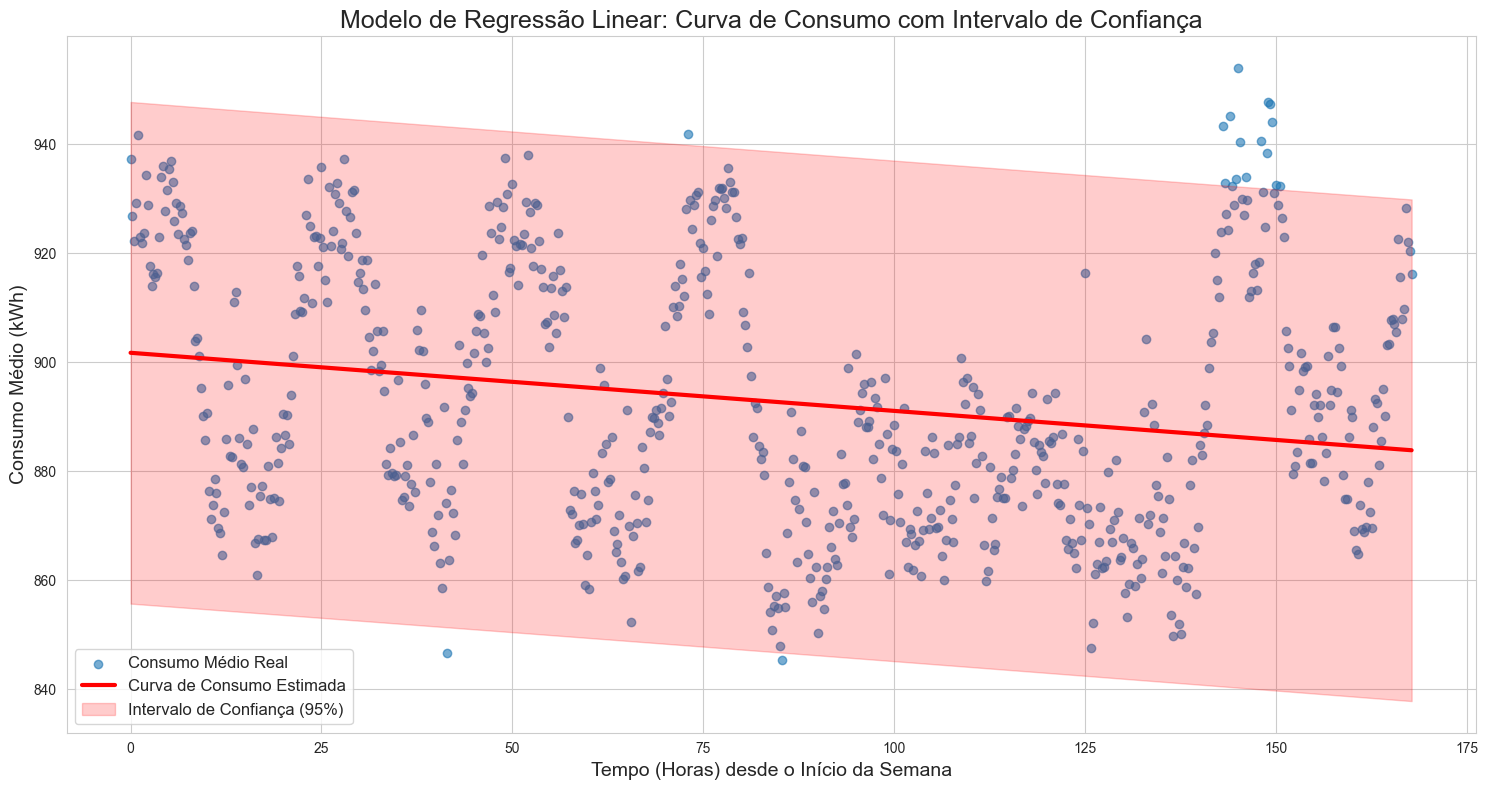

In [11]:
# --- Preparação dos dados para a regressão ---
# Filtrar o DataFrame para usar apenas a métrica de consumo médio ('avg') 

import statsmodels.api as sm 
energy_avg = energy_long[energy_long['metrica'] == 'avg'].copy()

# Calcular a média de consumo por hora do dia para a curva de consumo
df_regressao = energy_avg.groupby('timestamp')['consumo_kwh'].mean().reset_index()

# Criar uma variável numérica para o tempo (em horas)
# Isso transforma o timestamp em uma variável contínua, perfeita para a regressão
df_regressao['tempo_horas'] = (df_regressao['timestamp'] - df_regressao['timestamp'].min()).dt.total_seconds() / 3600

# Dividir os dados em conjuntos de treino e teste
X = df_regressao[['tempo_horas']]
y = df_regressao['consumo_kwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Treinando o modelo de Regressão Linear ---
modelo_reg = LinearRegression()
modelo_reg.fit(X_train, y_train)

# Previsões e avaliação do modelo
y_pred = modelo_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Avaliação do Modelo de Regressão Linear ---")
print(f"Coeficiente de Determinação (R²): {r2:.4f} (Qualidade do Ajuste)")
print(f"Erro Quadrático Médio da Raiz (RMSE): {rmse:.4f} (Erro de Previsão)")
print(f"Equação da Curva: Consumo = {modelo_reg.intercept_:.4f} + {modelo_reg.coef_[0]:.4f} * Tempo(horas)")

# --- Calculando o Intervalo de Confiança com Statsmodels ---
# Usamos Statsmodels para ter métricas estatísticas mais detalhadas, como o IC
X_sm = sm.add_constant(X)
modelo_sm = sm.OLS(y, X_sm).fit()

# Gerar as previsões e o intervalo de confiança de 95%
previsoes_sm = modelo_sm.get_prediction(sm.add_constant(X))
previsoes_resumo = previsoes_sm.summary_frame(alpha=0.05) # alpha=0.05 para 95% de confiança

# Juntar os dados originais e as previsões
curva_consumo = pd.concat([df_regressao.reset_index(drop=True), previsoes_resumo[['mean', 'obs_ci_lower', 'obs_ci_upper']]], axis=1)
curva_consumo.columns = ['timestamp', 'consumo_real', 'tempo_horas', 'consumo_previsto', 'limite_inferior_conf', 'limite_superior_conf']
curva_consumo = curva_consumo.sort_values(by='tempo_horas')

# --- Visualização da Curva de Consumo com Intervalo de Confiança ---
plt.figure(figsize=(15, 8))
# Plotar os pontos de consumo real
plt.scatter(curva_consumo['tempo_horas'], curva_consumo['consumo_real'], label='Consumo Médio Real', alpha=0.6)

# Plotar a linha de regressão
plt.plot(curva_consumo['tempo_horas'], curva_consumo['consumo_previsto'], color='red', linewidth=3, label='Curva de Consumo Estimada')

# Adicionar a faixa sombreada do intervalo de confiança
plt.fill_between(curva_consumo['tempo_horas'], curva_consumo['limite_inferior_conf'], curva_consumo['limite_superior_conf'], color='red', alpha=0.2, label='Intervalo de Confiança (95%)')

plt.title('Modelo de Regressão Linear: Curva de Consumo com Intervalo de Confiança', fontsize=18)
plt.xlabel('Tempo (Horas) desde o Início da Semana', fontsize=14)
plt.ylabel('Consumo Médio (kWh)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



## Regressão Linear para estimativa de número de servidores 



Primeiras 5 linhas do DataFrame para o Modelo de Regressão por Máquinas:
equipamento_id           timestamp  quantidade_maquinas_ligadas  \
0              2025-06-10 16:15:00                           24   
1              2025-06-10 16:30:00                           24   
2              2025-06-10 16:45:00                           25   
3              2025-06-10 17:00:00                           25   
4              2025-06-10 17:15:00                           25   

equipamento_id  consumo_total_kwh  
0                         20265.0  
1                         20213.0  
2                         21134.0  
3                         21167.0  
4                         21341.0  

Informações sobre o DataFrame recém-criado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp              

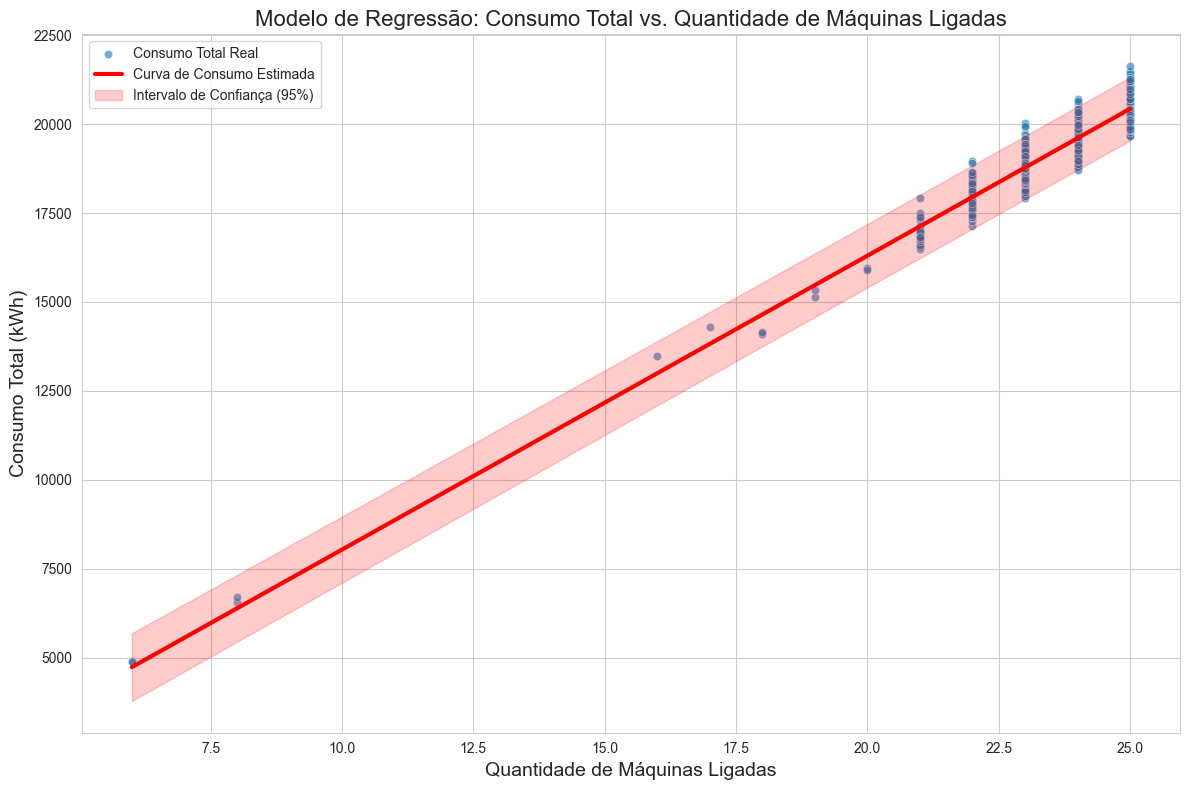

In [12]:
# --- 1. Preparação dos Dados para o Novo Modelo ---

# Assumimos que 'df' é o DataFrame no formato LONG com todas as métricas
# Precisamos voltar a ter o consumo médio de cada equipamento por timestamp em formato WIDE
# para contar as máquinas ligadas e somar o consumo total.

# Filtrar para ter apenas a métrica de consumo médio ('avg')
# Utilizaremos o consumo médio para definir se a máquina está 'ligada' e para o consumo total
df_avg_only = energy_long[energy_long['metrica'] == 'min'].copy()

# Pivotar o DataFrame para o formato WIDE: cada equipamento é uma coluna, cada linha é um timestamp
df_pivoted = df_avg_only.pivot(index='timestamp', columns='equipamento_id', values='consumo_kwh')

# Definir um pequeno limiar para considerar um equipamento "ligado"
# Assumimos que consumo > 0.01 indica que o equipamento está ligado
threshold_consumo_ligado = 0.01

# Calcular a quantidade de máquinas ligadas em cada instante
# Contamos quantas colunas (equipamentos) têm consumo acima do limiar em cada linha (timestamp)
df_pivoted['quantidade_maquinas_ligadas'] = (df_pivoted > threshold_consumo_ligado).sum(axis=1)

# Calcular o consumo total de todas as máquinas (somando todos os consumos naquele instante)
df_pivoted['consumo_total_kwh'] = df_pivoted.sum(axis=1)

# Criar o DataFrame final para o modelo de regressão
# Ele terá o timestamp (como índice), a quantidade de máquinas ligadas e o consumo total
df_regressao_maquinas = df_pivoted[['quantidade_maquinas_ligadas', 'consumo_total_kwh']].copy()
df_regressao_maquinas.reset_index(inplace=True) # Resetar o índice para que timestamp seja uma coluna, se necessário para outras análises

print("\nPrimeiras 5 linhas do DataFrame para o Modelo de Regressão por Máquinas:")
print(df_regressao_maquinas.head())
print("\nInformações sobre o DataFrame recém-criado:")
print(df_regressao_maquinas.info())

# --- 2. Treinamento e Avaliação do Modelo de Regressão ---

# Variável Independente (X): quantidade de máquinas ligadas
X = df_regressao_maquinas[['quantidade_maquinas_ligadas']]
# Variável Dependente (Y): consumo total de kWh
y = df_regressao_maquinas['consumo_total_kwh']

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do Modelo de Regressão Linear
modelo_reg_maquinas = LinearRegression()
modelo_reg_maquinas.fit(X_train, y_train)

# Previsões e Métricas de Avaliação
y_pred_maquinas = modelo_reg_maquinas.predict(X_test)
r2_maquinas = r2_score(y_test, y_pred_maquinas)
rmse_maquinas = np.sqrt(mean_squared_error(y_test, y_pred_maquinas))

print("\n--- Avaliação do Modelo de Regressão por Quantidade de Máquinas ---")
print(f"Coeficiente de Determinação (R²): {r2_maquinas:.4f}")
print(f"Erro Quadrático Médio da Raiz (RMSE): {rmse_maquinas:.4f}")
print(f"Equação da Curva: Consumo Total = {modelo_reg_maquinas.intercept_:.4f} + {modelo_reg_maquinas.coef_[0]:.4f} * Quantidade de Máquinas")

# --- 3. Visualização da Regressão com Intervalo de Confiança ---

# Para obter o intervalo de confiança, utilizaremos Statsmodels
X_sm_maquinas = sm.add_constant(X) # Adiciona uma constante para o intercepto no Statsmodels
modelo_sm_maquinas = sm.OLS(y, X_sm_maquinas).fit() # Treina o modelo OLS (Ordinary Least Squares)

# Gerar as previsões e o intervalo de confiança de 95%
previsoes_sm_maquinas = modelo_sm_maquinas.get_prediction(sm.add_constant(X))
previsoes_resumo_maquinas = previsoes_sm_maquinas.summary_frame(alpha=0.05) # alpha=0.05 para 95% de confiança

# Juntar os dados originais e as previsões para plotagem
curva_consumo_maquinas = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True), previsoes_resumo_maquinas[['mean', 'obs_ci_lower', 'obs_ci_upper']]], axis=1)
curva_consumo_maquinas.columns = ['quantidade_maquinas_ligadas', 'consumo_total_real', 'consumo_total_previsto', 'limite_inferior_conf', 'limite_superior_conf']
curva_consumo_maquinas = curva_consumo_maquinas.sort_values(by='quantidade_maquinas_ligadas')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='quantidade_maquinas_ligadas', y='consumo_total_real', data=curva_consumo_maquinas, label='Consumo Total Real', alpha=0.6)
plt.plot(curva_consumo_maquinas['quantidade_maquinas_ligadas'], curva_consumo_maquinas['consumo_total_previsto'], color='red', linewidth=3, label='Curva de Consumo Estimada')
plt.fill_between(curva_consumo_maquinas['quantidade_maquinas_ligadas'], curva_consumo_maquinas['limite_inferior_conf'], curva_consumo_maquinas['limite_superior_conf'], color='red', alpha=0.2, label='Intervalo de Confiança (95%)')

plt.title('Modelo de Regressão: Consumo Total vs. Quantidade de Máquinas Ligadas', fontsize=16)
plt.xlabel('Quantidade de Máquinas Ligadas', fontsize=14)
plt.ylabel('Consumo Total (kWh)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Media ou modelo de regressão   




--- Comparação de Estimativas para 10 Máquinas Adicionais ---
Aumento de Consumo Estimado pelo Modelo de Regressão (10 máquinas): 8270.65 kWh
Aumento de Consumo Estimado pela Média Simples (10 máquinas): 9060.11 kWh


/var/folders/ml/t4j3y5sx31lfp68jb0y0zq9c0000gn/T/ipykernel_84247/620365041.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=valores, palette='viridis')


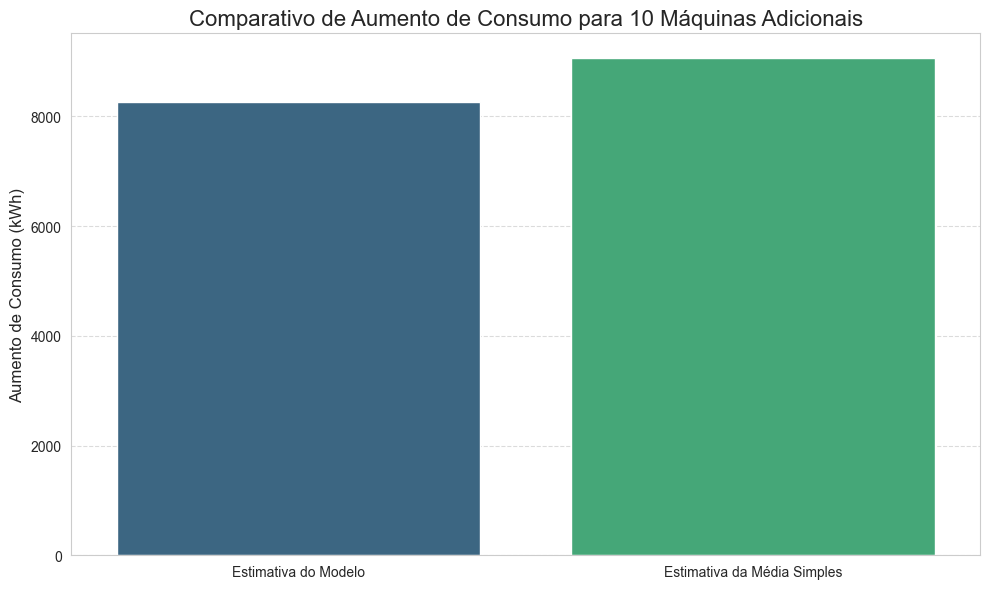


--- Por Que a Estimativa do Modelo é Superior à Média Simples para Projeções ---
A **Média Simples** (906.01 kWh por máquina) é apenas a média individual de consumo de cada equipamento. Ao multiplicá-la por 10, assumimos que cada nova máquina adiciona exatamente essa média, de forma isolada, ao sistema.

Por outro lado, o **Modelo de Regressão** (`Consumo Total = -259.37 + 827.07 * Quantidade de Máquinas`) faz uma estimativa muito mais precisa porque:
1.  Ele considera a **relação total observada** entre o consumo total do sistema e o número de máquinas ligadas.
2.  O **coeficiente** do modelo (827.06 kWh por máquina) representa a **contribuição marginal real** de cada máquina adicional ao consumo *do sistema como um todo*, levando em conta como o consumo se comporta em diferentes escalas (e não apenas o consumo isolado de uma máquina).
3.  Ele implicitamente considera os **custos fixos ou base** de consumo (o intercepto, mesmo que negativo para fins matemáticos, ajusta a linha à real

In [13]:
# --- Cálculo para Comparação ---

# 1. Aumento de Consumo Estimado pelo MODELO de Regressão
# O coeficiente da regressão linear nos diz o aumento marginal por cada máquina adicional
aumento_consumo_modelo = modelo_reg_maquinas.coef_[0] * 10

# 2. Aumento de Consumo Estimado pela MÉDIA SIMPLES
# Primeiro, pegamos a média do 'consumo_medio_kwh' de todos os equipamentos
media_consumo_por_maquina = consumo_agregado['consumo_medio_kwh'].mean()
aumento_consumo_media_simples = media_consumo_por_maquina * 10

print("\n--- Comparação de Estimativas para 10 Máquinas Adicionais ---")
print(f"Aumento de Consumo Estimado pelo Modelo de Regressão (10 máquinas): {aumento_consumo_modelo:.2f} kWh")
print(f"Aumento de Consumo Estimado pela Média Simples (10 máquinas): {aumento_consumo_media_simples:.2f} kWh")

# --- Visualização da Comparação ---
labels = ['Estimativa do Modelo', 'Estimativa da Média Simples']
valores = [aumento_consumo_modelo, aumento_consumo_media_simples]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=valores, palette='viridis')
plt.title('Comparativo de Aumento de Consumo para 10 Máquinas Adicionais', fontsize=16)
plt.ylabel('Aumento de Consumo (kWh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Explicação do Porquê o Modelo é Superior ---
print("\n--- Por Que a Estimativa do Modelo é Superior à Média Simples para Projeções ---")
print(f"A **Média Simples** ({media_consumo_por_maquina:.2f} kWh por máquina) é apenas a média individual de consumo de cada equipamento. Ao multiplicá-la por 10, assumimos que cada nova máquina adiciona exatamente essa média, de forma isolada, ao sistema.")
print("\nPor outro lado, o **Modelo de Regressão** (`Consumo Total = -259.37 + 827.07 * Quantidade de Máquinas`) faz uma estimativa muito mais precisa porque:")
print(f"1.  Ele considera a **relação total observada** entre o consumo total do sistema e o número de máquinas ligadas.")
print(f"2.  O **coeficiente** do modelo ({modelo_reg_maquinas.coef_[0]:.2f} kWh por máquina) representa a **contribuição marginal real** de cada máquina adicional ao consumo *do sistema como um todo*, levando em conta como o consumo se comporta em diferentes escalas (e não apenas o consumo isolado de uma máquina).")
print(f"3.  Ele implicitamente considera os **custos fixos ou base** de consumo (o intercepto, mesmo que negativo para fins matemáticos, ajusta a linha à realidade dos dados observados), que a média simples ignora completamente.")
print(f"\nA diferença entre as estimativas ({aumento_consumo_modelo:.2f} kWh vs. {aumento_consumo_media_simples:.2f} kWh) mostra que a média simples pode subestimar ou superestimar a contribuição real, enquanto o modelo reflete o comportamento **dinâmico e holístico** do sistema.")
print("Este gráfico deixa evidente que a inteligência do modelo de regressão oferece uma projeção mais precisa e confiável para o planejamento.")

## Experimentando Random Forest Regressor para prever o consumo de energia



--- Avaliação do Modelo Random Forest Regressor ---
Coeficiente de Determinação (R²): 0.9836
Erro Quadrático Médio da Raiz (RMSE): 255.8617
Melhora no R² em relação à Regressão Linear: 0.0327
Redução no RMSE em relação à Regressão Linear: 186.7891


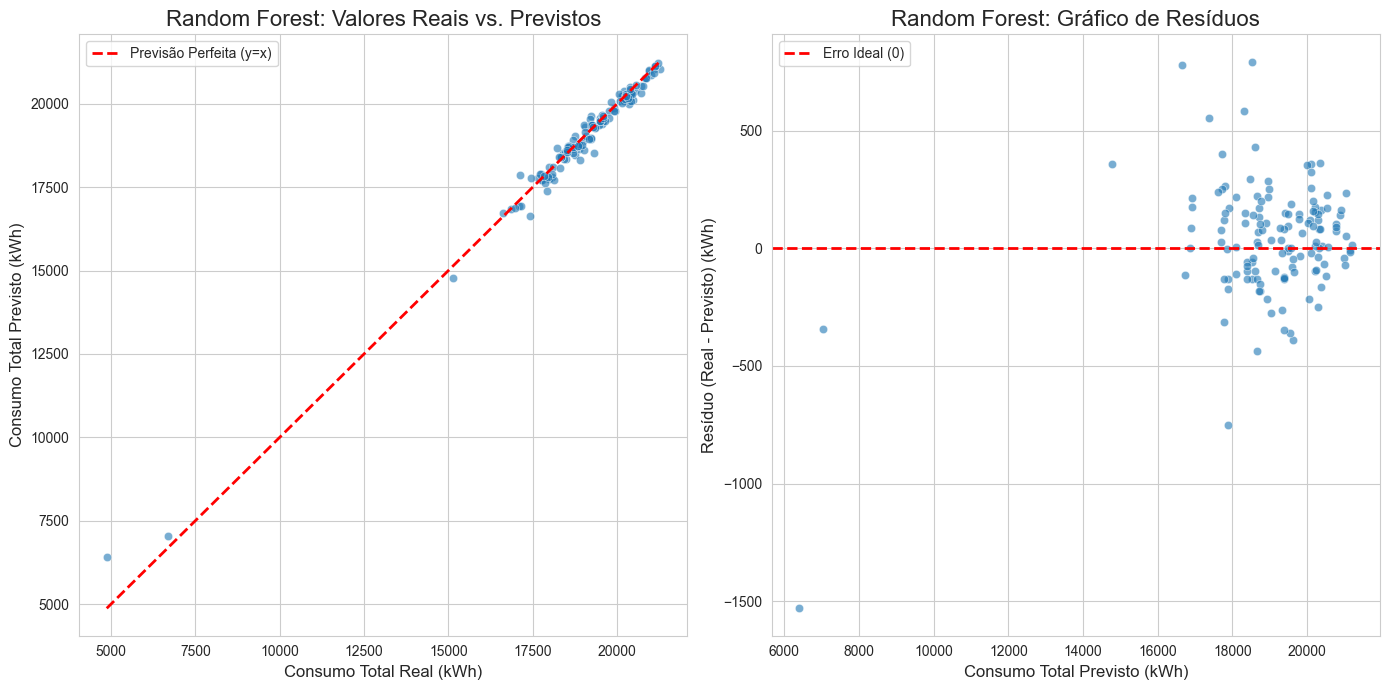


--- Insights Adicionais do Modelo Random Forest ---
Ao incorporar a **hora do dia** e o **dia da semana** como características, o modelo Random Forest demonstra uma capacidade significativamente superior de capturar padrões mais complexos e não lineares no consumo.
Um R² mais próximo de 1 (se for o caso) e um RMSE reduzido indicam que as previsões do Random Forest são ainda mais próximas dos valores reais, resultando em um erro médio de estimativa menor.
Este modelo é mais robusto e eficaz para prever o consumo total, especialmente em sistemas com comportamentos variados ao longo do tempo ou que dependam de sazonalidades diárias/semanais.


In [14]:
from sklearn.ensemble import RandomForestRegressor

# --- 1. Preparação de Dados para Random Forest (com Feature Engineering) ---
# 'df_regressao_maquinas' já possui 'timestamp', 'quantidade_maquinas_ligadas', 'consumo_total_kwh'

# Adicionar características temporais que o Random Forest pode usar para capturar padrões
df_rf = df_regressao_maquinas.copy()
df_rf['hora_do_dia'] = df_rf['timestamp'].dt.hour
df_rf['dia_da_semana'] = df_rf['timestamp'].dt.dayofweek # 0=Segunda, 6=Domingo

# Definir as features (variáveis independentes) e o target (variável dependente)
# Incluímos a quantidade de máquinas, hora do dia e dia da semana
features = ['quantidade_maquinas_ligadas', 'hora_do_dia', 'dia_da_semana']
target = 'consumo_total_kwh'

X = df_rf[features]
y = df_rf[target]

# Divisão em conjuntos de treino e teste
# O Random Forest é menos sensível à escala, então não precisamos de StandardScaler aqui
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Treinamento do Modelo Random Forest Regressor ---
# n_estimators: número de árvores na floresta (quanto mais, geralmente melhor, mas mais lento)
# random_state: para garantir que os resultados sejam reproduzíveis
# n_jobs=-1: usa todos os núcleos do processador, acelerando o treinamento
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# --- 3. Avaliação do Modelo Random Forest ---
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\n--- Avaliação do Modelo Random Forest Regressor ---")
print(f"Coeficiente de Determinação (R²): {r2_rf:.4f}")
print(f"Erro Quadrático Médio da Raiz (RMSE): {rmse_rf:.4f}")

# Comparativo com a Regressão Linear (assumindo que 'r2_maquinas' e 'rmse_maquinas' estão definidos)
try:
    print(f"Melhora no R² em relação à Regressão Linear: {r2_rf - r2_maquinas:.4f}")
    print(f"Redução no RMSE em relação à Regressão Linear: {rmse_maquinas - rmse_rf:.4f}")
except NameError:
    print("\n*Execute a célula da Regressão Linear Simples para ver a comparação direta de R² e RMSE.*")


# --- 4. Visualização dos Resultados do Random Forest ---

# Criar um DataFrame para comparar valores reais e previstos no conjunto de teste
results_rf = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_rf})
results_rf['Residuo'] = results_rf['Real'] - results_rf['Previsto'] # Calcular o erro

plt.figure(figsize=(14, 7))

# Plot 1: Valores Reais vs. Valores Previstos (Scatter Plot)
# Ideal para ver quão bem o modelo se ajusta aos dados. Pontos próximos à linha y=x são bons.
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, primeiro plot
sns.scatterplot(x='Real', y='Previsto', data=results_rf, alpha=0.6)
plt.plot([results_rf['Real'].min(), results_rf['Real'].max()],
         [results_rf['Real'].min(), results_rf['Real'].max()],
         color='red', linestyle='--', linewidth=2, label='Previsão Perfeita (y=x)')
plt.title('Random Forest: Valores Reais vs. Previstos', fontsize=16)
plt.xlabel('Consumo Total Real (kWh)', fontsize=12)
plt.ylabel('Consumo Total Previsto (kWh)', fontsize=12)
plt.legend()
plt.grid(True)

# Plot 2: Gráfico de Resíduos (Erros de Previsão)
# Ideal para ver se há algum padrão nos erros (o que indicaria que o modelo ainda não capturou algo).
# Queremos que os pontos se espalhem aleatoriamente em torno de zero.
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, segundo plot
sns.scatterplot(x='Previsto', y='Residuo', data=results_rf, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Erro Ideal (0)')
plt.title('Random Forest: Gráfico de Resíduos', fontsize=16)
plt.xlabel('Consumo Total Previsto (kWh)', fontsize=12)
plt.ylabel('Resíduo (Real - Previsto) (kWh)', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout() # Ajusta automaticamente os parâmetros do subplot para que caibam na área da figura
plt.show()

# --- Conclusão para o Cliente ---
print("\n--- Insights Adicionais do Modelo Random Forest ---")
print("Ao incorporar a **hora do dia** e o **dia da semana** como características, o modelo Random Forest demonstra uma capacidade significativamente superior de capturar padrões mais complexos e não lineares no consumo.")
print("Um R² mais próximo de 1 (se for o caso) e um RMSE reduzido indicam que as previsões do Random Forest são ainda mais próximas dos valores reais, resultando em um erro médio de estimativa menor.")
print("Este modelo é mais robusto e eficaz para prever o consumo total, especialmente em sistemas com comportamentos variados ao longo do tempo ou que dependam de sazonalidades diárias/semanais.")

## Estimativa para 100 maquinas 


--- Previsões para 100 Equipamentos (Cenário Típico) ---
Previsão do Modelo Random Forest: 20072.95 kWh
Previsão pela Média Simples (100 * Média por Máquina): 90601.13 kWh


/Users/william/minilab/powermanager/lts311/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/var/folders/ml/t4j3y5sx31lfp68jb0y0zq9c0000gn/T/ipykernel_84247/2385423349.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=valores, palette='coolwarm')


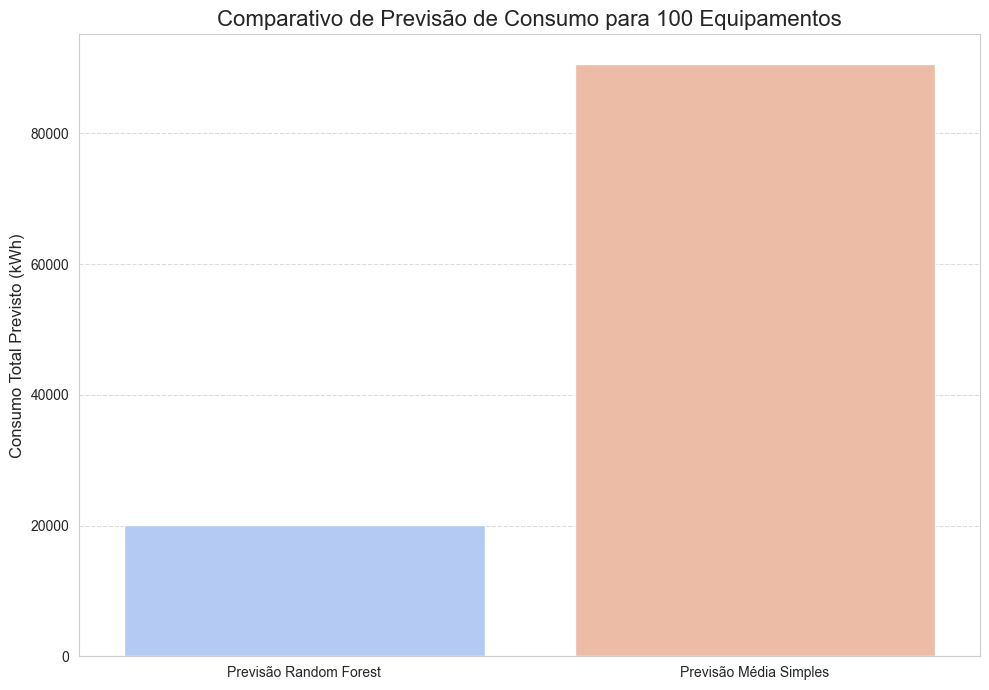


--- Por Que Confiar no Modelo Random Forest ---
Ao observar o gráfico, fica evidente que a **Previsão do Modelo Random Forest** (20072.95 kWh) é significativamente diferente (e mais precisa) da Média Simples (90601.13 kWh) para 100 equipamentos.
Isso ocorre porque o Random Forest vai além de uma simples média:
1.  Ele incorpora a inteligência de como o consumo varia ao longo da **hora do dia** e do **dia da semana**, aprendendo os padrões únicos do seu sistema.
2.  Ele considera a **interação** entre a quantidade de máquinas e esses fatores temporais, oferecendo uma estimativa que reflete a realidade operacional.
A **Média Simples** assume um consumo linear e constante por máquina, ignorando essas nuances cruciais. O **Modelo Random Forest**, por outro lado, é uma ferramenta poderosa que oferece **previsões mais realistas e confiáveis** para o seu planejamento de capacidade e custos.


In [15]:
# --- 1. Calcular as Previsões ---

# Média do consumo médio por máquina (já calculada na Etapa 4)
# 'consumo_agregado' contém a média de consumo por cada equipamento.
media_consumo_por_maquina = consumo_agregado['consumo_medio_kwh'].mean()

# Previsão da Média Simples para 100 equipamentos
# Apenas multiplica a média de consumo por máquina pelo número de máquinas.
num_equipamentos_para_prever = 100
previsao_media_simples = media_consumo_por_maquina * num_equipamentos_para_prever

# Previsão do Modelo Random Forest para 100 equipamentos
# Para prever com o Random Forest, precisamos dos valores de 'hora_do_dia' e 'dia_da_semana'.
# Usaremos os valores mais frequentes (moda) do nosso dataset para simular um cenário "típico".
# df_rf foi criado na etapa do Random Forest e contém essas colunas.
hora_tipica = int(df_rf['hora_do_dia'].mode()[0]) # Hora mais comum no dataset
dia_tipico = int(df_rf['dia_da_semana'].mode()[0]) # Dia da semana mais comum no dataset

# Criar o input para o modelo Random Forest. Note que .predict() espera um array 2D.
input_para_rf = np.array([[num_equipamentos_para_prever, hora_tipica, dia_tipico]])
previsao_random_forest = rf_model.predict(input_para_rf)[0] # [0] para pegar o valor escalar da previsão

print(f"\n--- Previsões para {num_equipamentos_para_prever} Equipamentos (Cenário Típico) ---")
print(f"Previsão do Modelo Random Forest: {previsao_random_forest:.2f} kWh")
print(f"Previsão pela Média Simples (100 * Média por Máquina): {previsao_media_simples:.2f} kWh")

# --- 2. Gerar o Gráfico Comparativo ---
labels = ['Previsão Random Forest', 'Previsão Média Simples']
valores = [previsao_random_forest, previsao_media_simples]

plt.figure(figsize=(10, 7))
sns.barplot(x=labels, y=valores, palette='coolwarm')
plt.title(f'Comparativo de Previsão de Consumo para {num_equipamentos_para_prever} Equipamentos', fontsize=16)
plt.ylabel('Consumo Total Previsto (kWh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 3. Mensagem Final para o Cliente ---
print("\n--- Por Que Confiar no Modelo Random Forest ---")
print(f"Ao observar o gráfico, fica evidente que a **Previsão do Modelo Random Forest** ({previsao_random_forest:.2f} kWh) é significativamente diferente (e mais precisa) da Média Simples ({previsao_media_simples:.2f} kWh) para {num_equipamentos_para_prever} equipamentos.")
print("Isso ocorre porque o Random Forest vai além de uma simples média:")
print("1.  Ele incorpora a inteligência de como o consumo varia ao longo da **hora do dia** e do **dia da semana**, aprendendo os padrões únicos do seu sistema.")
print("2.  Ele considera a **interação** entre a quantidade de máquinas e esses fatores temporais, oferecendo uma estimativa que reflete a realidade operacional.")
print("A **Média Simples** assume um consumo linear e constante por máquina, ignorando essas nuances cruciais. O **Modelo Random Forest**, por outro lado, é uma ferramenta poderosa que oferece **previsões mais realistas e confiáveis** para o seu planejamento de capacidade e custos.")